## Final Project - Group 1 - AAI 530
### Zach Artman, Iman Hamdan, Diego Aceveda

In [24]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Data Exploration

In [2]:
# Downloading the dataset
path = kagglehub.dataset_download("hemanthkarnati/indoor-air-quality-dataset")
dataset_path = f"{path}/indoor_data.csv"

In [3]:
# Read the dataset
df = pd.read_csv(dataset_path)

# Explore the first few entries of the dataset
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,latitude,longitude,elevation,status
0,2024-04-06 12:00:27+05:30,1256,163,42.0,33.8,49.0,520.0,18.0,21.0,NaN,NaN,NaN,NaN
1,2024-04-06 12:01:30+05:30,1257,162,37.0,33.8,49.0,637.0,36.0,9.0,NaN,NaN,NaN,NaN
2,2024-04-06 12:02:32+05:30,1258,173,47.0,33.7,50.0,679.0,42.0,3.0,NaN,NaN,NaN,NaN
3,2024-04-06 12:03:34+05:30,1259,168,37.0,33.3,51.0,539.0,21.0,0.0,NaN,NaN,NaN,NaN
4,2024-04-06 12:04:36+05:30,1260,168,37.0,33.3,52.0,697.0,45.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Explore the last few entries of the dataset
df.tail()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,latitude,longitude,elevation,status
1328,2024-04-07 11:54:43+05:30,2584,195,46.0,32.8,51.0,493.0,14.0,0.0,NaN,NaN,NaN,NaN
1329,2024-04-07 11:55:45+05:30,2585,198,40.0,32.8,50.0,539.0,21.0,0.0,NaN,NaN,NaN,NaN
1330,2024-04-07 11:56:47+05:30,2586,191,39.0,32.8,50.0,464.0,9.0,432.0,NaN,NaN,NaN,NaN
1331,2024-04-07 11:58:44+05:30,2587,191,43.0,32.8,49.0,454.0,8.0,0.0,NaN,NaN,NaN,NaN
1332,2024-04-07 11:59:46+05:30,2588,191,39.0,32.8,49.0,493.0,14.0,0.0,NaN,NaN,NaN,NaN


Dataset shows data roughly every minute from April 6, 2024 at 12:00 to April 7, 2024 at 11:59

## Preprocessing

In [5]:
# Drop the columns that have all NaN values
columns_to_drop = ['latitude', 'longitude', 'elevation', 'status']
df.drop(columns_to_drop, axis=1, inplace=True)

In [6]:
# Assert the columns were dropped
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7
0,2024-04-06 12:00:27+05:30,1256,163,42.0,33.8,49.0,520.0,18.0,21.0
1,2024-04-06 12:01:30+05:30,1257,162,37.0,33.8,49.0,637.0,36.0,9.0
2,2024-04-06 12:02:32+05:30,1258,173,47.0,33.7,50.0,679.0,42.0,3.0
3,2024-04-06 12:03:34+05:30,1259,168,37.0,33.3,51.0,539.0,21.0,0.0
4,2024-04-06 12:04:36+05:30,1260,168,37.0,33.3,52.0,697.0,45.0,0.0


In [7]:
# Checking the datatypes
df.dtypes

created_at     object
entry_id        int64
field1          int64
field2        float64
field3        float64
field4        float64
field5        float64
field6        float64
field7        float64
dtype: object

Fixing the remaining datatypes

In [8]:
# Convert the created_at column to a datetime object
df['Datetime'] = pd.to_datetime(df['created_at'])
df.drop('created_at', axis=1, inplace=True)

In [9]:
df.head()

,entry_id,field1,field2,field3,field4,field5,field6,field7,Datetime
0,1256,163,42.0,33.8,49.0,520.0,18.0,21.0,2024-04-06 12:00:27+05:30
1,1257,162,37.0,33.8,49.0,637.0,36.0,9.0,2024-04-06 12:01:30+05:30
2,1258,173,47.0,33.7,50.0,679.0,42.0,3.0,2024-04-06 12:02:32+05:30
3,1259,168,37.0,33.3,51.0,539.0,21.0,0.0,2024-04-06 12:03:34+05:30
4,1260,168,37.0,33.3,52.0,697.0,45.0,0.0,2024-04-06 12:04:36+05:30


In [10]:
# Asserting that the created column is the proper type
df.dtypes

entry_id                        int64
field1                          int64
field2                        float64
field3                        float64
field4                        float64
field5                        float64
field6                        float64
field7                        float64
Datetime    datetime64[ns, UTC+05:30]
dtype: object

In [11]:
# Create a minute column defining how many minutes has passed
df['minute'] = pd.to_datetime(df['Datetime'])
df['minute'] = (df['minute'] - df['minute'][0]).dt.total_seconds() // 60

Checking the data

In [12]:
df.head()

,entry_id,field1,field2,field3,field4,field5,field6,field7,Datetime,minute
0,1256,163,42.0,33.8,49.0,520.0,18.0,21.0,2024-04-06 12:00:27+05:30,0.0
1,1257,162,37.0,33.8,49.0,637.0,36.0,9.0,2024-04-06 12:01:30+05:30,1.0
2,1258,173,47.0,33.7,50.0,679.0,42.0,3.0,2024-04-06 12:02:32+05:30,2.0
3,1259,168,37.0,33.3,51.0,539.0,21.0,0.0,2024-04-06 12:03:34+05:30,3.0
4,1260,168,37.0,33.3,52.0,697.0,45.0,0.0,2024-04-06 12:04:36+05:30,4.0


In [13]:
df.tail()

,entry_id,field1,field2,field3,field4,field5,field6,field7,Datetime,minute
1328,2584,195,46.0,32.8,51.0,493.0,14.0,0.0,2024-04-07 11:54:43+05:30,1434.0
1329,2585,198,40.0,32.8,50.0,539.0,21.0,0.0,2024-04-07 11:55:45+05:30,1435.0
1330,2586,191,39.0,32.8,50.0,464.0,9.0,432.0,2024-04-07 11:56:47+05:30,1436.0
1331,2587,191,43.0,32.8,49.0,454.0,8.0,0.0,2024-04-07 11:58:44+05:30,1438.0
1332,2588,191,39.0,32.8,49.0,493.0,14.0,0.0,2024-04-07 11:59:46+05:30,1439.0


In [14]:
# Rename the columns based on the actual values
df.rename(columns={
    'field1': 'CO_ppm',
    'field2': 'AirQuality',
    'field3': 'Temperature',
    'field4': 'Humidity',
    'field5': 'eCO2_ppm',
    'field6': 'TVOC_ppb',
    'field7': 'DustDensity_ugm3'
}, inplace=True)
df.head()

,entry_id,CO_ppm,AirQuality,Temperature,Humidity,eCO2_ppm,TVOC_ppb,DustDensity_ugm3,Datetime,minute
0,1256,163,42.0,33.8,49.0,520.0,18.0,21.0,2024-04-06 12:00:27+05:30,0.0
1,1257,162,37.0,33.8,49.0,637.0,36.0,9.0,2024-04-06 12:01:30+05:30,1.0
2,1258,173,47.0,33.7,50.0,679.0,42.0,3.0,2024-04-06 12:02:32+05:30,2.0
3,1259,168,37.0,33.3,51.0,539.0,21.0,0.0,2024-04-06 12:03:34+05:30,3.0
4,1260,168,37.0,33.3,52.0,697.0,45.0,0.0,2024-04-06 12:04:36+05:30,4.0


In [17]:
# Checking for missing values
missing_values = df.isnull().sum()

missing_values


entry_id            0
CO_ppm              0
AirQuality          0
Temperature         0
Humidity            0
eCO2_ppm            0
TVOC_ppb            0
DustDensity_ugm3    0
Datetime            0
minute              0
dtype: int64


In [19]:
# Normalizing sensor data for better comparison
sensor_cols = ['CO_ppm', 'AirQuality', 'Temperature', 'Humidity', 'eCO2_ppm', 'TVOC_ppb', 'DustDensity_ugm3']
df[sensor_cols] = (df[sensor_cols] - df[sensor_cols].min()) / (df[sensor_cols].max() - df[sensor_cols].min())


In [22]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## Visualizing The Data

<Figure size 1200x600 with 0 Axes>

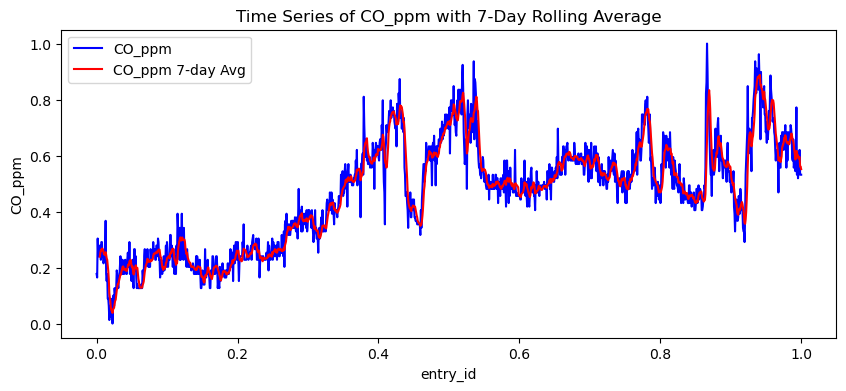

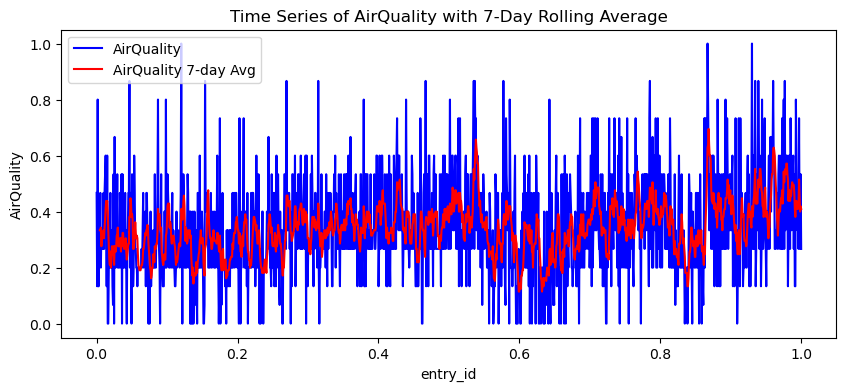

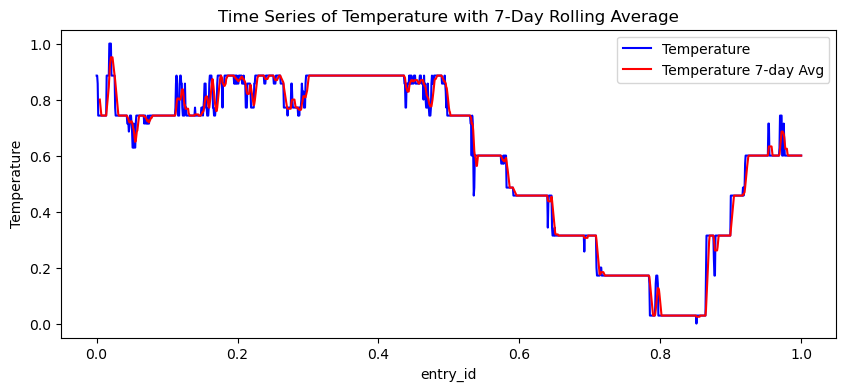

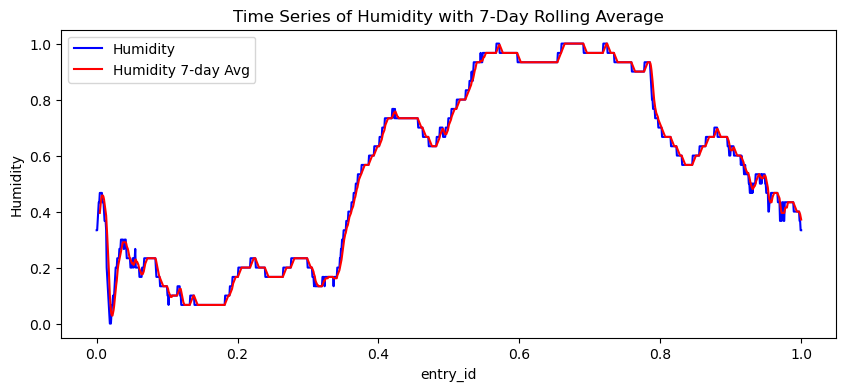

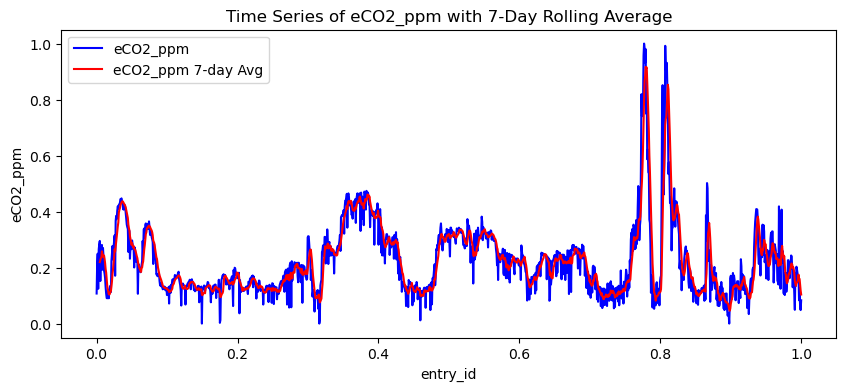

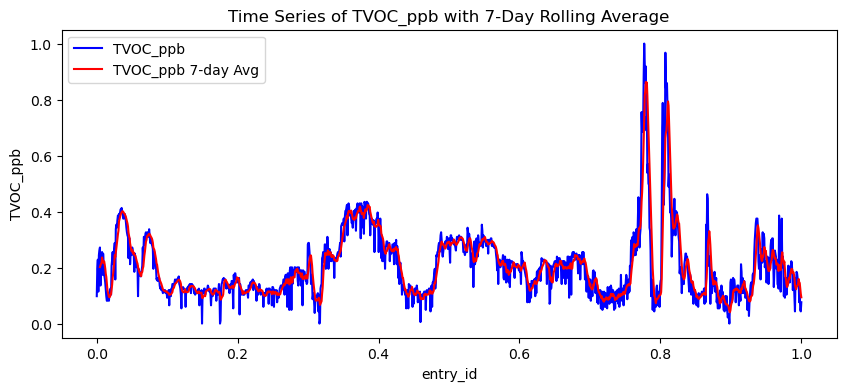

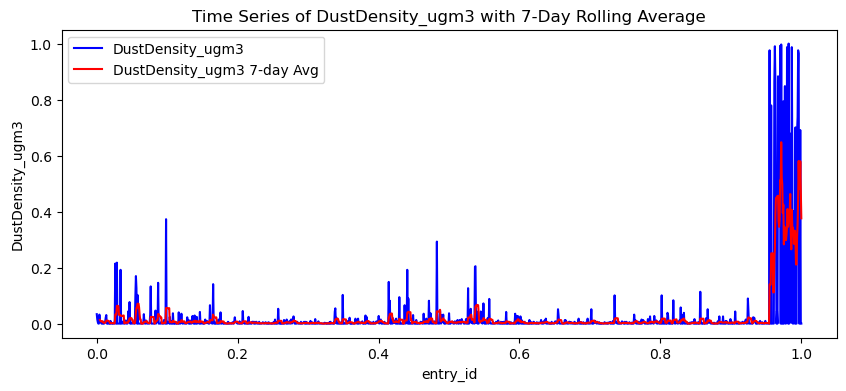

In [31]:
# Using rolling averages
rolling_window = 7

plt.figure(figsize=(12,6))
time_col = df.columns[0]

for col in df.columns[1:-2]:  
    plt.figure(figsize=(10,4))
    plt.plot(df[time_col], df[col], label=f'{col}', color='b')
    plt.plot(df[time_col], df[col].rolling(window=rolling_window).mean(), label=f'{col} {rolling_window}-day Avg', color='r')
    plt.xlabel(time_col)
    plt.ylabel(col)
    plt.title(f'Time Series of {col} with {rolling_window}-Day Rolling Average')
    plt.legend()
    plt.show()

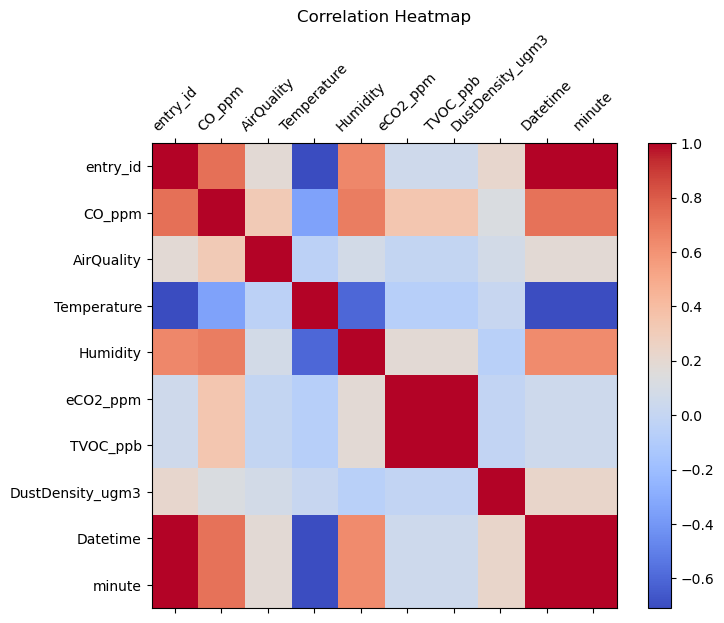

In [30]:
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()